**H:O:G: and SVM Image Classification with OpenCV and CV Studio**

Prject: Training an image classifier with SVM

We will learn how to train images with Support Vector Machines (SVM). SVM is a supervised learning model that analyze data used for classification and regression analysis. We will be using SVM for classify images.

We will be classifying images using <code>Sklearn</code> and <a href="https://vision.skills.network/"> Computer Vision Learning Studio (CV Studio)</a>. CV Studio is a fast, easy and collaborative open-source Computer Vision tool for teams and individuals. You can upload your datasets and label them yourself. If you created a separate folder for each image class, the tool will do the labeling for you. H.O.G. combined with SVM was one of the ways image classification was done before more advanced methods like Deep Learning became popular.


H.O.G = Histogram of Oriented Gradients 

<ul>
    <li>This tool contains the following sections:
        <ul>
            <li>Import Libraries</li>
            <li>Image Files and Paths  </li>
            <li>Plotting an Image </li>
            <li>H.O.G. as a feature descriptor </li>
            <li>SVM for Image classification </li>
            <li>Save your model to CVStudio</li>
            <li>What's Next</li>
        </ul>
    </li>
</ul>


----

In [2]:
#Libraries for data processing and visualization:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime

In [3]:
pip install --upgrade numpy scikit-learn scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 52.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 41.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show numpy scikit-learn scipy


Name: numpy
Version: 1.21.6
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /home/jupyterlab/conda/envs/python/lib/python3.7/site-packages
Requires: 
Required-by: basemap, Bottleneck, folium, h5py, imagecodecs-lite, imageio, Keras, Keras-Applications, Keras-Preprocessing, matplotlib, numexpr, pandas, patsy, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, systemml, tensorboard, tensorflow, tifffile, torchvision
---
Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/jupyterlab/conda/envs/python/lib/python3.7/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: systemml
---
Name: scipy
Version: 1.7.3
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.or

In [5]:
#Libraries for image pre-processing and classification:
import cv2
import joblib
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [6]:
#Libraries for OS and Cloud:
import os
from skillsnetwork import cvstudio

We will load and process every image. Let's go over some concepts:

<ul>
        <ul>
            <li><code>cv2.resize()</code> to resize the image </li>
            <li><code>cv2.COLOR_BGR2GRAY()</code> will convert the images to greyscale image</li>
            <li><code>hog()</code> will get the H.O.G. features from the image </li>
        </ul>
    
</ul>

We will use this function to read and preprocess the images

In [7]:
def load_images(image_paths):
    #Loop over the input images
    for (i, image_path) in enumerate(image_paths):
        #read image
        image = cv2.imread(image_path)
        image = np.array(image).astype('uint8')
        image = cv2.resize(image,(64,64))
        grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hog_features, hog_images = hog(grey_image,visualize=True,block_norm='L2-Hys',pixels_per_cell=(16,16))
        #Label image using the annotations
        label = class_object.index(annotations["annotations"][image_path[7:]][0]['label'])
        train_images.append(hog_features)
        train_labels.append(label)
        

image_path[7:]:

Extracts a substring of the image_path, starting from the 7th character onward.
This is typically done to remove a prefix like images/ or a similar path segment.

**Downloading images and annotations**

In [8]:
#Initializing the CV Studio Client
cvstudioClient = cvstudio.CVStudio()

#Downloading images
#cvstudioClient.downloadAll()

In [9]:
annotations = cvstudioClient.get_annotations()

In [10]:
#First 5 examples in annotations.
first_five = {k: annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five

{'4b79788c-e6b7-4146-a536-b4e3f86a379d.jpg': [{'label': 'cat'}],
 '78c1a280-3ec1-4533-ae91-5a3ebb4c636e.jpg': [{'label': 'dog'}],
 '7376989d-3ef8-4d54-a02d-8ee1ea48223f.jpg': [{'label': 'dog'}],
 '16b84f52-1793-4a50-af65-0f68b73beadc.jpg': [{'label': 'dog'}],
 'ca317339-5942-4131-82c8-8495ac1c148a.jpg': [{'label': 'cat'}]}

**Histogram of Oriented Gradients (H.O.G.)**

H.O.G. generates a histogram for each localized region. We will pick a random image and see how HOG works.

In [11]:
sample_image = 'images/' + random.choice(list(annotations["annotations"].keys()))

In [12]:
sample_image = cv2.imread(sample_image)
sample_image = cv2.resize(sample_image, (64,64))
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

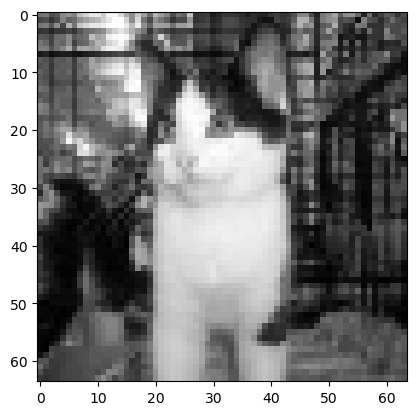

In [13]:
plt.imshow(sample_image, cmap=plt.cm.gray)

Run HOG on the grayscale image to see what it looks like.
HOG stands for Histogram of Oriented Gradients. It uses the gradient orientation of the localized regions of an image and generates a histogram for each localized region.

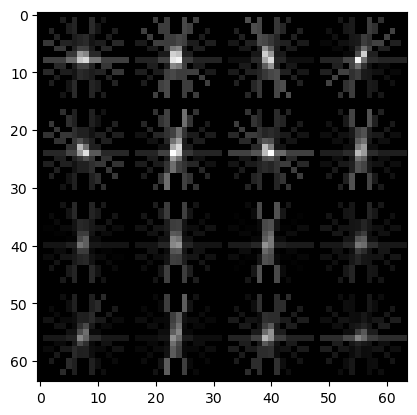

In [14]:
#Wen we run HOG, it returns an array of features and the image/output. The feature is what we need to train the SVM model.
sample_image_features, sample_hog_image = hog(sample_image, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16,16))
plt.imshow(sample_hog_image, cmap=plt.cm.gray)
#sample_hog_image: is just for visualization. 

**load images and Generate Training/Testing Dataset**

In [15]:
#Initiating a location for svaing loaded images:
image_paths = list(paths.list_images('images'))
train_images = []
train_labels = []
class_object = annotations['labels']

In [16]:
load_images(image_paths)

Create an array of the images and use the 'np.vstack' to vertically stack arrays for wrangling.

In [17]:
train_array = np.array(train_images)
train_array = np.vstack(train_array)

In [18]:
labels_array = np.array(train_labels)

In [19]:
labels_array = labels_array.astype(int)
labels_array = labels_array.reshape((labels_array.size,1))

In [20]:
#Conacatinating images and labels:
concat_df = np.concatenate([train_array, labels_array], axis=1)

In [21]:
#Dividing the data in to training and testset:
percentage = 75
partition = int(len(concat_df)*percentage/100)

In [22]:
x_train, x_test = concat_df[:partition, :-1], concat_df[partition:, :-1]
y_train, y_test = concat_df[:partition, -1:].ravel(), concat_df[partition:, -1:].ravel()


**Hyperparameters**

The kernel type to be used is a hyperparameter. The most common kernels are <code>RBF</code>, <code>poly</code>, or <code>sigmoid</code>. You can also create your own kernel.

<code>C</code> behaves as a regularization parameter in the SVM. The <code>C</code> parameter trades off correct classification of the training examples against the maximization of the decision function’s margin. For larger values of <code>C</code>, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower <code>C</code> will encourage a larger margin, therefore a simpler decision function at the cost of accuracy. We select C and the best kernel by using the validation data. 


The  python dictionary <code>param_grid</code>  has different kernels and values of C. We can test them using the validation data.


In [23]:
param_grid = {'kernel': ('linear','rbf'),'C':[1,4,5,10]}

<code>gamma</code> is a parameter of the RBF kernel and can be thought of as the spread of the kernel and, therefore, the decision region. Low values mean ‘far’ and high values mean ‘close’. The behaviour of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself. We create a Support Vector Classification object.


**Support Vector Machines**

In [24]:
base_estimator = SVC(gamma='scale')

We will train the model and try different kernels and parameter values using the function 'GridSearchCV'. The resulting output will be the model that performs best on the validation data.

In [25]:
start_datetime = datetime.now()
start = time.time()

svm = GridSearchCV(base_estimator, param_grid, cv=5)
#Fitting the data into the classifier
svm.fit(x_train, y_train)
#Get values of the grid search
best_parameters = svm.best_params_
print(best_parameters)
y_pred = svm.predict(x_test)
#Accuracy score for the model on validation set.
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))

end = time.time()
end_datetime = datetime.now()
print(end -start)

{'C': 1, 'kernel': 'linear'}
Accuracy: 0.62
0.40605711936950684


Get confusion Matrix for SVM results:

In [26]:
label_names = [0,1]
cmx = confusion_matrix(y_test, y_pred, labels = label_names)

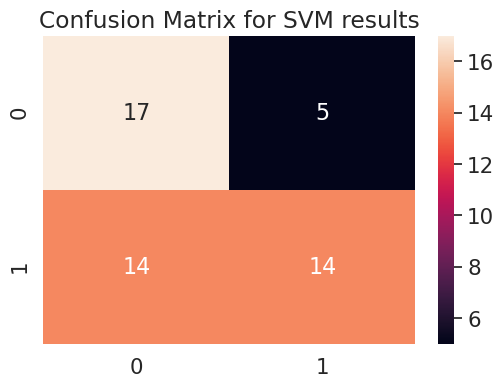

In [28]:
df_cm = pd.DataFrame(cmx)
plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,annot_kws={"size":16})
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

**Reporting back our results to CV Studio**

In [29]:
parameters = {'best_params': best_parameters}
result = cvstudioClient.report(started=start_datetime, completed=end_datetime, parameters=parameters, accuracy=accuracy_score(y_test,y_pred))
if result.ok:
    print('Congratulations your results have been reported back to CV Studio')

Congratulations your results have been reported back to CV Studio


In [31]:
#Save the SVM model to a file
joblib.dump(svm.best_estimator_, 'svm.joblib')

['svm.joblib']

In [32]:
#Saving the model back to CV Studio
result = cvstudioClient.uploadModel('svm.joblib',{'svm_best':svm.best_estimator_})

File Uploaded
